Linear Regression example on Life Satisfaction GDP Dataset

In [1]:
# Standard imports and assertions to ensure we have the right versions of Python etc. 
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import pandas as pd

In [2]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

Load the data. This is created from the life satisfaction datasets used by Geron in chapter 1
see https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb
It assumes the file is stored locally in this case in the same location as this notebook

In [3]:
# Load the data
country_stats = pd.read_csv("Life Satisfaction GDP Dataset.csv")

Let's have a quick look at the first few values of the data. 

In [4]:
country_stats.head()

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


Next, we can plot the data (always a good idea as we shall see)

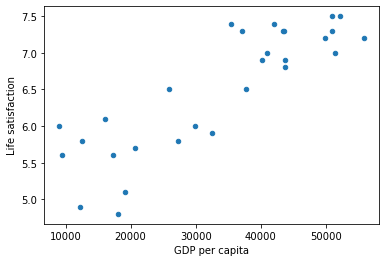

In [5]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

We can add details of which country is which into the plot as follows.
The x, y and label values are extracted from the dataframe and converted into an array with the np_c function.

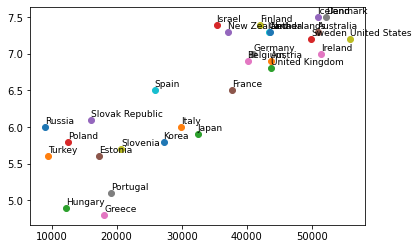

In [6]:
xvals = np.c_[country_stats["GDP per capita"]]
yvals = np.c_[country_stats["Life satisfaction"]]
country_labels = np.c_[country_stats["Country"]]
for i,lab in enumerate(country_labels):
    xi = xvals[i,0]
    yi = yvals[i,0]
    plt.scatter(xi, yi)
    plt.text(xi+0.05, yi+0.05, lab[0], fontsize=9)
plt.show()

We're going to try creating a very simple model using linear regression as it looks like there is a roughly linear relationship between GDP and Life Satisfaction.
The range of the y-axis exaggerates the difference and if we re-plot the data this relationship becomes clearer.

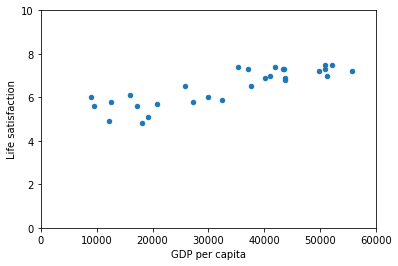

In [7]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
plt.show()

Our linear regression model is simply created as follows using the LinearRegression class from scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
The X and y values are again extracted from the dataframe and represent the independent and dependent variables
(the values used to make a prediction, and the values we are trying to predict respectively).
By fitting the model we are going to create 
the line of best fit through this data which minimises the errors (the residuals).

In [8]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
# Train the model
model.fit(X, y)

LinearRegression()

We can find out how well out model captures the relationship between the data by looking at the score value (R-squared)

In [9]:
model.score(X,y)

0.734441435543703

We can also find out the details of the model by looking at the coefficients and intercept values. 
This is a very simple univariate regression model remember so these values correspond to the gradient 
and intercept values of the  - m and c respectively - in the standard equation for a straight line (y = mx + c)

In [10]:
model.coef_

array([[4.91154459e-05]])

In [11]:
model.intercept_

array([4.8530528])

We can then plot this line over the original data to give an illustration of the model we have created 

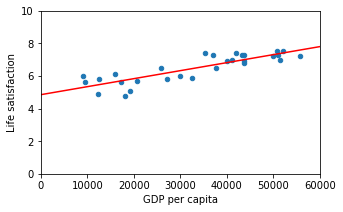

In [12]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000) #generate 1000 values between 0 and 60000 to create the line
plt.plot(X, t0 + t1*X, "r")
plt.show()

Having created this model we can then use it to make predictions of the life satisfaction score for a country that 
we have not previously considered in the data provided we have a value for its GDP.
For example, we know might know that the per capita GPD for Cyprus is $22587 which we can feed into our model as follows:

In [13]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new))

[[5.96242338]]


Remember, this is just a prediction based on our model. Cyprus's actual life satisfaction score could well be different to this!